In [344]:
# !pip install pmdarima

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [2]:
import os
os.chdir(r"/home/reventh/Downloads")

In [104]:
li = []
for i in range(2000, 2015):
    li.append(pd.read_csv("Renewable Energy Data//Rajasthan4//20012_26.25_73.05_" + str(i) +  ".csv", skiprows=2))

data = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
data

In [ ]:
data_temp  = data[['DHI', 'DNI','GHI','Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'Temperature','Pressure','Relative Humidity','Solar Zenith Angle', 'Wind Speed']]

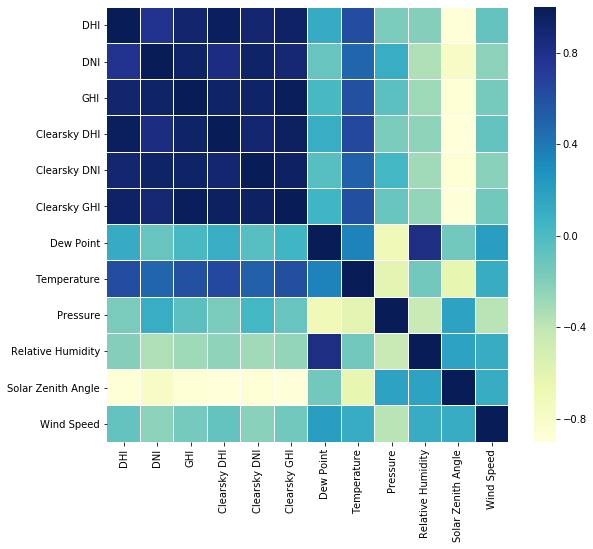

In [82]:
corrmat = data_temp.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [83]:
corrmat

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
DHI,1.000000,0.781668,0.912730,0.974822,0.899370,0.947878,0.121215,0.614761,-0.168243,-0.205604,-0.883669,-0.086097
DNI,0.781668,1.000000,0.936675,0.829522,0.935355,0.884304,-0.096286,0.484784,0.102371,-0.343433,-0.789085,-0.231595
GHI,0.912730,0.936675,1.000000,0.934895,0.939160,0.979312,0.022879,0.603442,-0.060483,-0.286698,-0.864282,-0.145385
Clearsky DHI,0.974822,0.829522,0.934895,1.000000,0.910662,0.960030,0.107535,0.643525,-0.168470,-0.233423,-0.901942,-0.088842
Clearsky DNI,0.899370,0.935355,0.939160,0.910662,1.000000,0.952834,-0.035727,0.512334,0.040801,-0.295587,-0.871376,-0.225157
Clearsky GHI,0.947878,0.884304,0.979312,0.960030,0.952834,1.000000,0.055946,0.606773,-0.095726,-0.254021,-0.888614,-0.136354
Dew Point,0.121215,-0.096286,0.022879,0.107535,-0.035727,0.055946,1.000000,0.351845,-0.704093,0.827133,-0.140920,0.198766
Temperature,0.614761,0.484784,0.603442,0.643525,0.512334,0.606773,0.351845,1.000000,-0.603093,-0.142310,-0.626767,0.115610
Pressure,-0.168243,0.102371,-0.060483,-0.168470,0.040801,-0.095726,-0.704093,-0.603093,1.000000,-0.439894,0.181391,-0.381754
Relative Humidity,-0.205604,-0.343433,-0.286698,-0.233423,-0.295587,-0.254021,0.827133,-0.142310,-0.439894,1.000000,0.181285,0.111417


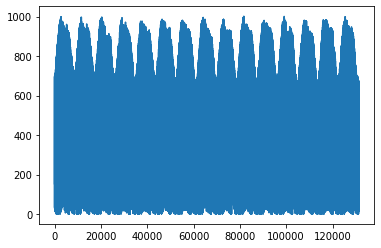

In [84]:
import matplotlib.pyplot as plt
# print(data_temp.head())
plt.plot( data_temp[data_temp['GHI']>0][['GHI']])

In [85]:
data_temp_weekly = [data_temp[i*24*7:(i+1)*24*7]['GHI'].mean() for i in range(0,int(len(data_temp)/(24*7)))]
data_temp_monthly = list(data.groupby(['Year', 'Month'])['GHI'].mean())
data_temp_daily = list(data.groupby(['Year', 'Month', 'Day'])['GHI'].mean())

In [40]:
# data.groupby(['Year', 'Month', 'Day'])['GHI'].mean()

5475

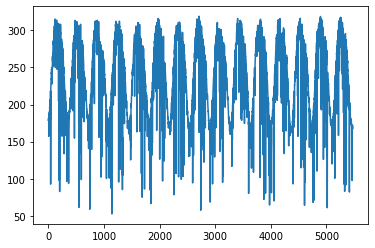

In [41]:
plt.plot(data_temp_daily)
len(data_temp_daily)

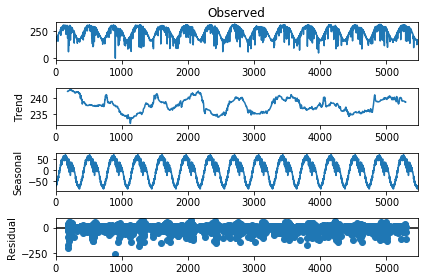

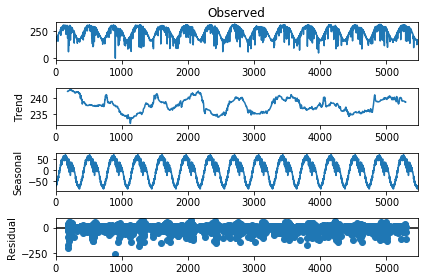

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose 
  
# ETS Decomposition 
result = seasonal_decompose(data_temp_daily,  
                            model ='additive', period = 365) 
  
# ETS plot 
result.plot()

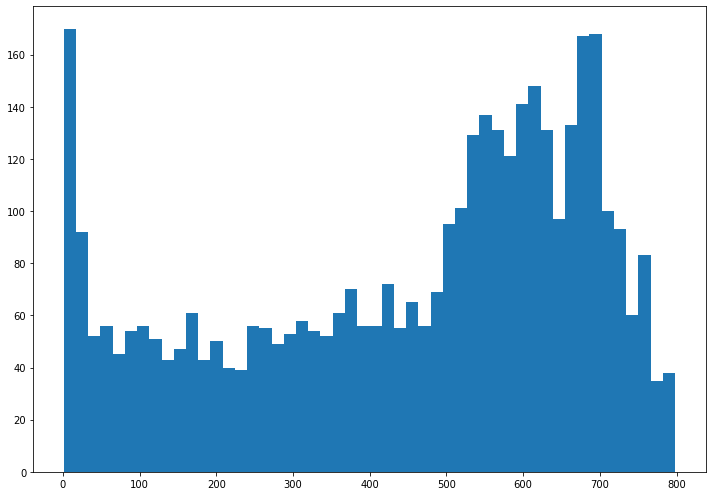

In [341]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

n_bins = 50
d = []
for i in data_temp['DNI']:
    if i >0:
        d.append(i)
fig, axs = plt.subplots(1, 1, 
                        figsize =(10, 7),  
                        tight_layout = True) 
  
axs.hist(d, bins = n_bins) 
  
# Show plot 
plt.show() 

<class 'list'>
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0000211] [loc=459.700 scale=229.514] 
[distfit] >[expon     ] [RSS: 0.0000429] [loc=1.000 scale=458.700] 
[distfit] >[pareto    ] [RSS: 0.0000716] [loc=-22348.576 scale=22348.825] 
[distfit] >[dweibull  ] [RSS: 0.0000186] [loc=433.535 scale=224.402] 
[distfit] >[t         ] [RSS: 0.0000211] [loc=459.701 scale=229.522] 
[distfit] >[genextreme] [RSS: 0.0000108] [loc=412.689 scale=248.381] 
[distfit] >[gamma     ] [RSS: 0.0000226] [loc=-3068.588 scale=15.500] 
[distfit] >[lognorm   ] [RSS: 0.0000215] [loc=-22494.813 scale=22952.253] 
[distfit] >[beta      ] [RSS: 0.0000128] [loc=-90.624 scale=928.633] 
[distfit] >[uniform   ] [RSS: 0.0000175] [loc=1.000 scale=837.000] 
[distfit] >Compute confidence interval [parametric]
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x7fca6161afd0>, 'params': (0.5839553812139646, 412.68895323837467, 248.38130717143812), 'name': 'genextreme', 'RSS': 1

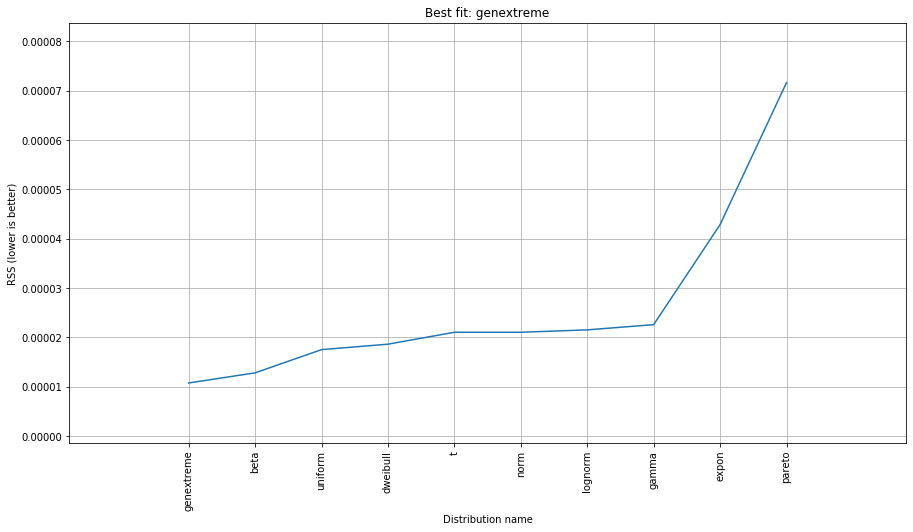

[distfit] >plot..


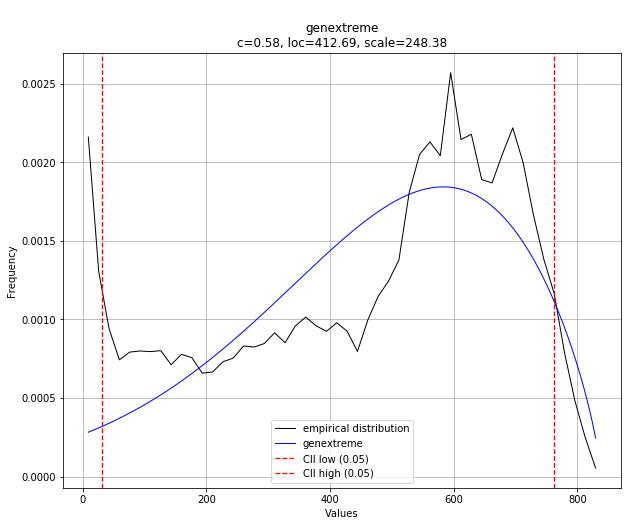

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca42ae3550>)

In [378]:
# !pip install distfit
from distfit import distfit
dist = distfit(alpha=0.05)
print(type(data_temp_daily))
d =[]
for i in data_temp['DNI']:
    if i >0:
        d.append(i)
# Search for best theoretical fit on your empirical data
dist.fit_transform(np.asarray(d, dtype=np.float32))
print(dist.model)
print(dist.summary)

# Plot the summary of fitted distributions
dist.plot_summary()
dist.plot()

In [379]:
def distribution_check(daily_temp_data, i):
    import matplotlib.pyplot as plt
    import scipy
    from scipy import stats

#     list_of_dists = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
    list_of_dists =['gamma', 'beta','expon', 'rayleigh', 'norm','logistic','lognorm','dweibull','uniform']

    
    results = []
    d = []
    for i in daily_temp_data:
        if i >0:
            d.append(i)
    size = len(d)
    print(size)
    x = scipy.arange(size)
    for i in list_of_dists:
        dist = getattr(stats, i)
        params = dist.fit(d)
        a = stats.kstest(d, i, args=params)
        results.append((i,a[0],a[1]))
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale, *arg)*size
        plt.plot(pdf_fitted, label=i)
        plt.xlim(min(d),max(d))
        plt.ylim(0,200)
    plt.legend(loc = 'best')
    n_bins = int(max(d))+1


    plt.hist(d, bins = n_bins) 
    plt.savefig('a.jpeg',dpi =1000)
    plt.show()
    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results:
        print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

59258


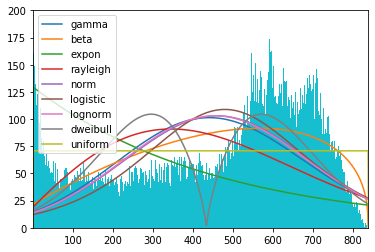

gamma: statistic=0.1303817229867989, pvalue=0.0
beta: statistic=0.09343795258789994, pvalue=0.0
expon: statistic=0.22458030942625107, pvalue=0.0
rayleigh: statistic=0.1632846867626736, pvalue=0.0
norm: statistic=0.11858502546932875, pvalue=0.0
logistic: statistic=0.08932556718339024, pvalue=0.0
lognorm: statistic=0.12226814002278935, pvalue=0.0
dweibull: statistic=0.12544514981362254, pvalue=0.0
uniform: statistic=0.13936134852543042, pvalue=0.0


In [380]:
# distribution_check(data_temp['GHI'],0)
distribution_check(data_temp['DNI'],1)

In [126]:
# data_temp['GHI']

782

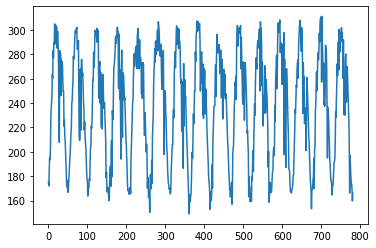

In [16]:
plt.plot(data_temp_weekly)
len(data_temp_weekly)

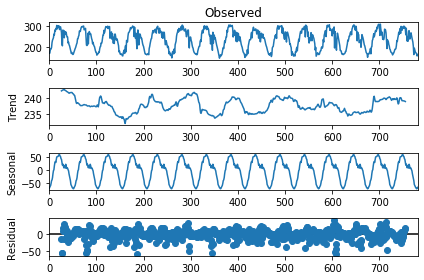

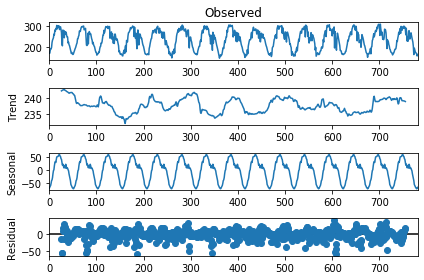

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose 
  
# ETS Decomposition 
result = seasonal_decompose(data_temp_weekly,  
                            model ='additive', period = 52) 
  
# ETS plot 
result.plot()

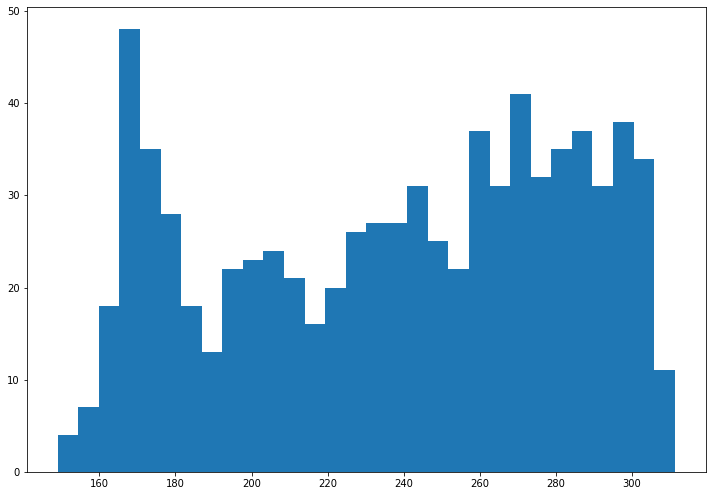

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

n_bins = 30
fig, axs = plt.subplots(1, 1, 
                        figsize =(10, 7),  
                        tight_layout = True) 
  
axs.hist(data_temp_weekly, bins = n_bins) 
  
# Show plot 
plt.show()

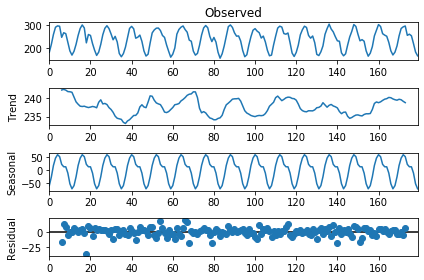

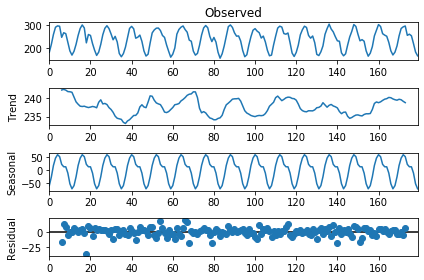

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose 
  
# ETS Decomposition 
result = seasonal_decompose(data_temp_monthly,  
                            model ='additive', period = 12) 
  
# ETS plot 
result.plot()

180

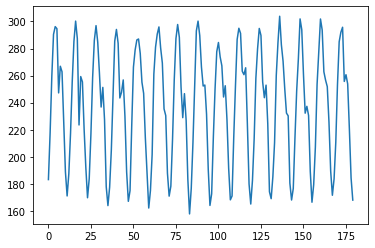

In [20]:
plt.plot(data_temp_monthly)
len(data_temp_monthly)

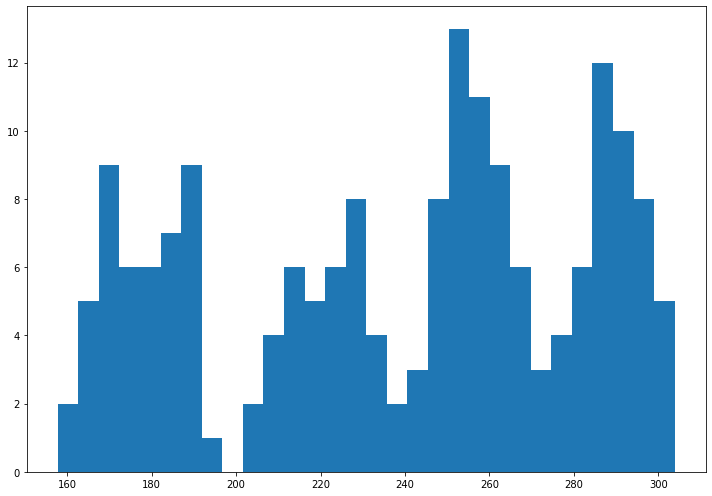

In [21]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

n_bins = 30
fig, axs = plt.subplots(1, 1, 
                        figsize =(10, 7),  
                        tight_layout = True) 
  
axs.hist(data_temp_monthly, bins = n_bins) 
  
# Show plot 
plt.show()

In [22]:
from scipy import stats
stat, p = stats.kstest(data_temp_daily[0:365], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)


In [23]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
# normality test
stat, p = shapiro(data_temp_daily[0:365])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.922, p=0.000
Sample does not look Gaussian (reject H0)


In [24]:

from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(data_temp_monthly, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = 1, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1341.907, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1287.031, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1314.908, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1277.717, Time=1.04 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.48 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1301.656, Time=0.67 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1257.113, Time=1.41 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1263.084, Time=0.51 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=11.43 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.21 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1239.389, Time=1.65 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1243.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  180
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -613.694
Date:                            Sun, 22 Nov 2020   AIC                           1239.389
Time:                                    11:01:56   BIC                           1258.097
Sample:                                         0   HQIC                          1246.982
                                            - 180                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6325      0.059    -10.752      0.000      -0.748      -0.517
ar.L2         -0.5321      0.079     -6.736      0.000      -0.687      -0.377
ar.L3         -0.3354      0.064     -5.217      0.000      -0.461      -0.209
ar.S.L12      -0.5122      0.083     -6.166      0.000      -0.675      -0.349
ar.S.L24      -0.2088      0.063     -3.330      0.001      -0.332      -0.086
sigma2        88.8288      7.822     11.356      0.000      73.497     104.160
===================================================================================
Ljung-Box (Q):                       75.69   Jarque-Bera (JB):                22.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.40
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# The more negative this statistic, the more likely we are 
# to reject the null hypothesis (we have a stationary dataset).
from statsmodels.tsa.stattools import adfuller
X = data_temp_monthly
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print("Rejecting Null hypothesis, the time series is stationary")

ADF Statistic: -4.046909
p-value: 0.001184
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
Rejecting Null hypothesis, the time series is stationary


# SARIMA

In [103]:
# Initial approximation of parameters
from itertools import product
train = data_temp_monthly[:len(data_temp_weekly)-52] 
test = data_temp_monthly[len(data_temp_weekly)-52:]
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(train, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 52)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  

predictions = best_model.predict(start, end, 
                             typ = 'levels')
  
plt.plot(predictions, label = 'pred') 
plt.plot(test, label = 'test') 
plt.legend()

In [26]:

# Split data into train / test sets 
train = data_temp_monthly[:len(data_temp_monthly)-12] 
test = data_temp_monthly[len(data_temp_monthly)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,  
                order = (3, 1, 0),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(3, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -561.541
Date:                              Sun, 22 Nov 2020   AIC                           1137.082
Time:                                      11:02:02   BIC                           1158.386
Sample:                                           0   HQIC                          1145.735
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6503      0.068     -9.528      0.000      -0.784      -0.517
ar.L2         -0.5580      0.081     -6.922      0.000      -0.716      -0.400
ar.L3         -0.3310      0.068     -4.863      0.000      -0.464      -0.198
ar.S.L12       0.0724      0.112      0.646      0.518      -0.147       0.292
ar.S.L24      -0.0456      0.099     -0.461      0.645      -0.240       0.149
ma.S.L12      -0.8180      0.115     -7.099      0.000      -1.044      -0.592
sigma2        75.2970      6.930     10.865      0.000      61.714      88.880
===================================================================================
Ljung-Box (Q):                       43.14   Jarque-Bera (JB):                33.89
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -0.25
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

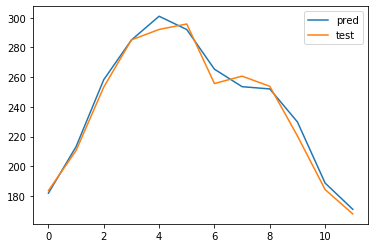

In [27]:

start = len(train) 
end = len(train) + len(test) - 1
  

predictions = result.predict(start, end, 
                             typ = 'levels')
  
 
plt.plot(predictions, label = 'pred') 
plt.plot(test, label = 'test') 
plt.legend()


# ARIMA

In [28]:
auto_arima(data_temp_daily, ic = "aic", d=1)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=False)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5109
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23463.211
Method:                       css-mle   S.D. of innovations             23.891
Date:                Sun, 22 Nov 2020   AIC                          46934.422
Time:                        11:02:30   BIC                          46960.577
Sample:                             1   HQIC                         46943.579
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.073     -0.014      0.989      -0.144       0.141
ar.L1.D.y      0.2855      0.017     16.423      0.000       0.251       0.320
ma.L1.D.y     -0.8447      0.009    -92.367      0.0

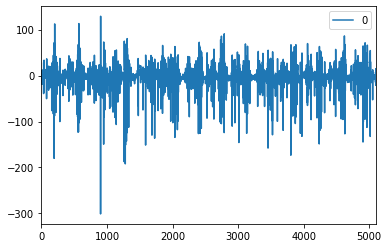

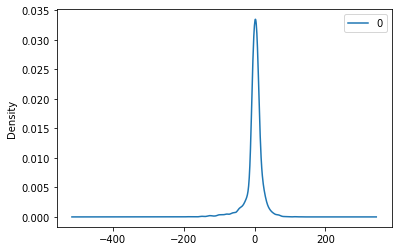

                 0
count  5109.000000
mean      0.000334
std      23.893571
min    -300.921242
25%      -5.349674
50%       2.319440
75%       9.680072
max     128.838781


In [29]:
# Split data into train / test sets 
train = data_temp_daily[:len(data_temp_daily)-365] 
test = data_temp_daily[len(data_temp_daily)-365:] # set one year(12 months) for testing 

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

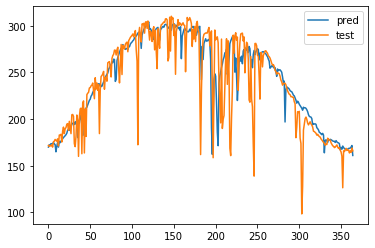

In [30]:


  
# # Predictions for one-year against the test set 
# predictions = model_fit.predict(start, end, 
#                              typ = 'levels')

a = df_month2['SO2']
train = a[:len(a)-365]
test =a[len(a)-365:]
start = len(train) 
end = len(train) + len(test) - 1
model = SARIMAX(train,  
                order = (1, 1, 1),  
                seasonal_order =(0, 1, 1, 12)) 
model_fit = model.fit(disp=0)
predictions = []
for t in range(len(test)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = data_temp_daily[t]
    train.append(obs)
    model = SARIMAX(train,  
                order = (1, 1, 1),  
                seasonal_order =(0, 1, 1, 12)) 
    model_fit = model.fit(disp=0)
    
# plot predictions and actual values 
plt.plot(predictions, label = 'pred') 
plt.plot(test, label = 'test') 
plt.legend()

In [31]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test, predictions) 
  
# Calculate mean squared error 
mean_squared_error(test, predictions) 

720.5851731502001

# ARMA

In [32]:
auto_arima(data_temp_monthly, ic = "aic", d=0)

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5110
Model:                     ARMA(2, 1)   Log Likelihood              -23459.750
Method:                       css-mle   S.D. of innovations             23.851
Date:                Sun, 22 Nov 2020   AIC                          46929.500
Time:                        11:10:19   BIC                          46962.195
Sample:                             0   HQIC                         46940.946
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        234.6583     10.161     23.093      0.000     214.743     254.574
ar.L1.y        1.2742      0.018     70.974      0.000       1.239       1.309
ar.L2.y       -0.2794      0.018    -15.880      0.0

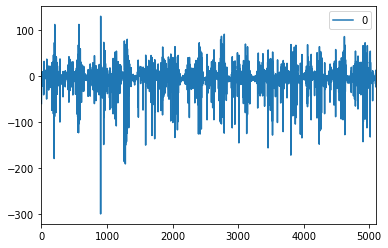

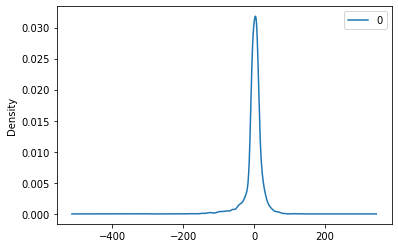

                 0
count  5110.000000
mean      0.081606
std      23.864109
min    -298.868927
25%      -5.672000
50%       2.667085
75%       9.827379
max     129.723783


In [33]:
# Split data into train / test sets 
train = data_temp_daily[:len(data_temp_daily)-365] 
test = data_temp_daily[len(data_temp_daily)-365:] # set one year(12 months) for testing 

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(train, order=(2,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

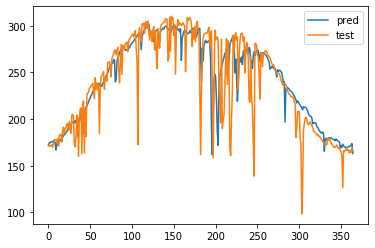

In [34]:
start = len(train) 
end = len(train) + len(test) - 1
  
# # Predictions for one-year against the test set 
# predictions = model_fit.predict(start, end, 
#                              typ = 'levels')

predictions = []
for t in range(len(test)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = data_temp_daily[t]
    train.append(obs)
    model = ARIMA(train, order=(2,0,1))
    model_fit = model.fit(disp=0)
    

# plot predictions and actual values 
plt.plot(predictions, label = 'pred') 
plt.plot(test, label = 'test') 
plt.legend()

In [35]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test, predictions) 
  
# Calculate mean squared error 
mean_squared_error(test, predictions) 

718.8117946008074

# AR

In [381]:
auto_arima(data_temp_daily, ic = "aic", d=0, max_p= 100,max_q =0, start_q= 0)

ARIMA(maxiter=50, method='lbfgs', order=(11, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5110
Model:                     ARMA(5, 0)   Log Likelihood              -23545.302
Method:                       css-mle   S.D. of innovations             24.254
Date:                Mon, 23 Nov 2020   AIC                          47104.603
Time:                        11:43:42   BIC                          47150.376
Sample:                             0   HQIC                         47120.628
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        236.9608      5.494     43.134      0.000     226.194     247.728
ar.L1.y        0.4850      0.014     35.144      0.000       0.458       0.512
ar.L2.y        0.1122      0.015      7.312      0.0

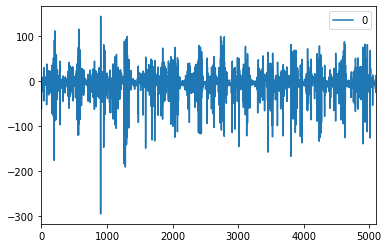

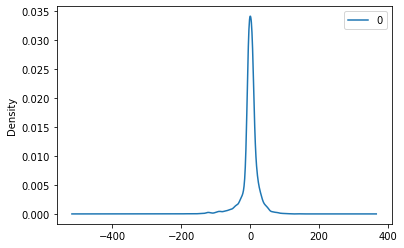

                 0
count  5110.000000
mean      0.038356
std      24.268066
min    -295.792148
25%      -5.287252
50%       1.509055
75%       8.340021
max     145.152171


In [382]:
# Split data into train / test sets 
train = data_temp_daily[:len(data_temp_daily)-365] 
test = data_temp_daily[len(data_temp_daily)-365:] # set one year(12 months) for testing 

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(train, order=(5,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

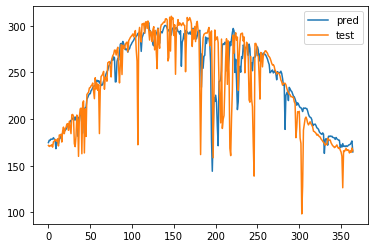

In [38]:
start = len(train) 
end = len(train) + len(test) - 1
  
# # Predictions for one-year against the test set 
# predictions = model_fit.predict(start, end, 
#                              typ = 'levels')
  

predictions = []
for t in range(len(test)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = data_temp_daily[t]
    train.append(obs)
    model = ARIMA(train, order=(5,0,0))
    model_fit = model.fit(disp=0)
    
# plot predictions and actual values 
plt.plot(predictions, label = 'pred') 
plt.plot(test, label = 'test') 
plt.legend()

In [39]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test, predictions) 
  
# Calculate mean squared error 
mean_squared_error(test, predictions) 

775.1220758269898

# MA

In [391]:
auto_arima(data_temp_daily, ic = "aic", d=0,max_q=10,start_q = 0, max_p =0, start_p= 0)

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 10), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5110
Model:                     ARMA(0, 5)   Log Likelihood              -24291.244
Method:                       css-mle   S.D. of innovations             28.068
Date:                Sun, 22 Nov 2020   AIC                          48596.487
Time:                        11:29:14   BIC                          48642.260
Sample:                             0   HQIC                         48612.512
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        237.7904      1.305    182.193      0.000     235.232     240.348
ma.L1.y        0.6850      0.015     46.981      0.000       0.656       0.714
ma.L2.y        0.5732      0.017     33.187      0.0

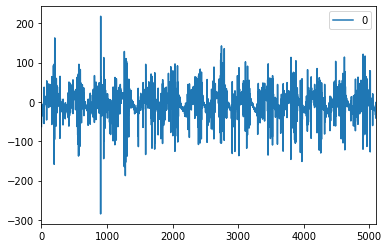

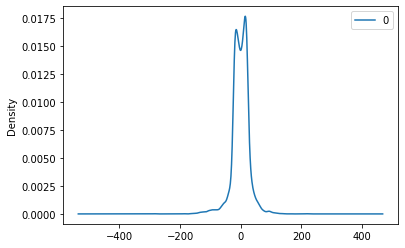

                 0
count  5110.000000
mean      0.005074
std      28.078528
min    -284.800835
25%     -15.386190
50%       1.152652
75%      16.539791
max     217.556448


In [41]:
# Split data into train / test sets 
train = data_temp_daily[:len(data_temp_daily)-365] 
test = data_temp_daily[len(data_temp_daily)-365:] # set one year(12 months) for testing 

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(train, order=(0,0,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

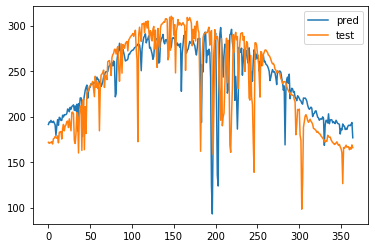

In [42]:
start = len(train) 
end = len(train) + len(test) - 1
  
# # Predictions for one-year against the test set 
# predictions = model_fit.predict(start, end, 
#                              typ = 'levels')

predictions = []
for t in range(len(test)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = data_temp_daily[t]
    train.append(obs)
    model = ARIMA(train, order=(0,0,5))
    model_fit = model.fit(disp=0)
    

  
# plot predictions and actual values 
plt.plot(predictions, label = 'pred') 
plt.plot(test, label = 'test') 
plt.legend()

In [8]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test, predictions) 
  
# Calculate mean squared error 
mean_squared_error(test, predictions) 

NameError: name 'test' is not defined

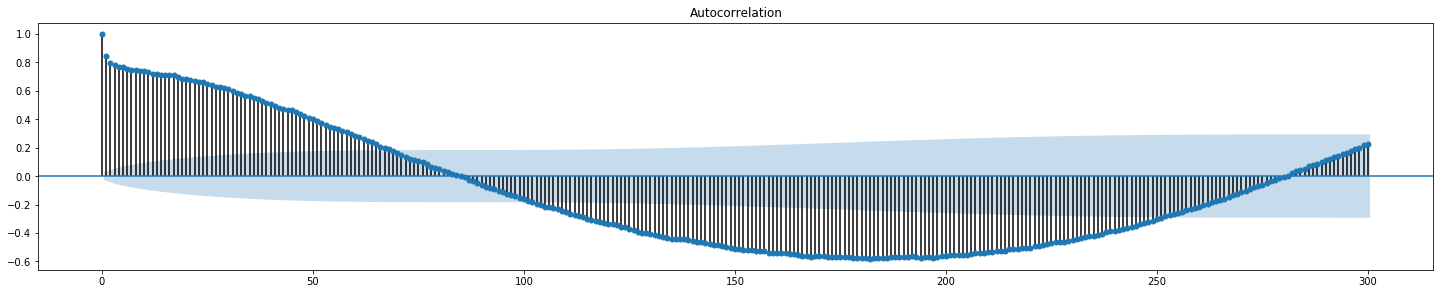

In [17]:
import statsmodels.api as sm

plt.figure(figsize=(25,10))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(np.array(data_temp_daily[365:]).squeeze(), lags=300, ax=ax)
plt.savefig('acf_less_lag.jpeg', dpi =1200,quality = 100)
plt.show()

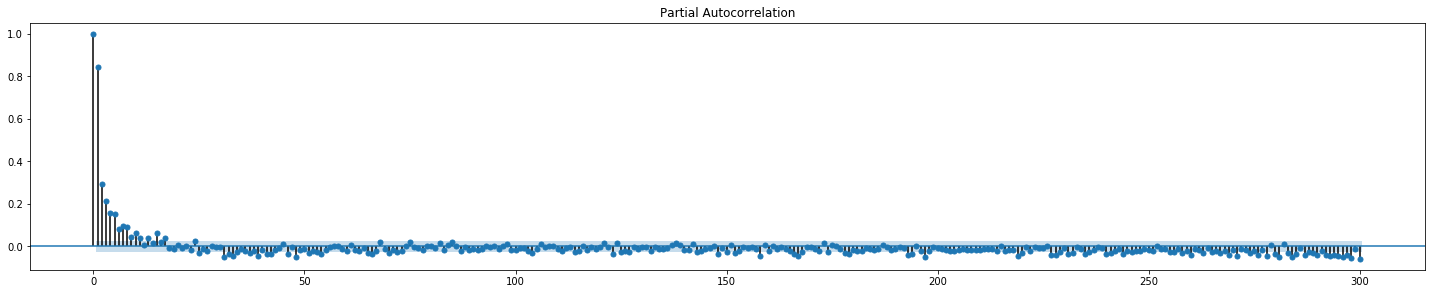

In [18]:
plt.figure(figsize=(25,10))
ax = plt.subplot(211)
sm.graphics.tsa.plot_pacf(np.array(data_temp_daily[365:]).squeeze(), lags=300, ax=ax)
plt.savefig('pacf.jpeg', dpi = 1200)
plt.show()

In [94]:
train = data_temp_monthly[:len(data_temp_monthly)-12] 
test = data_temp_monthly[len(data_temp_monthly)-12:]
train = np.reshape(train, (-1, 1))
test = np.reshape(test, (-1, 1))

In [95]:
import tensorflow as tf 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
from keras.preprocessing.sequence import TimeseriesGenerator
print(len(scaled_train))

168


In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
n_input = 12
n_feature = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)

In [13]:
model = Sequential()

model.add(LSTM(256,activation = 'relu', input_shape= (n_input, n_feature), return_sequences=True))
# model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W1127 19:19:11.745021 139871043700544 deprecation_wrapper.py:119] From /home/raj/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1127 19:19:12.074256 139871043700544 deprecation_wrapper.py:119] From /home/raj/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1127 19:19:12.118115 139871043700544 deprecation_wrapper.py:119] From /home/raj/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1127 19:19:14.026031 139871043700544 deprecation_wrapper.py:119] From /home/raj/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 256)           264192    
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 128)           197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 510,785
Trainable params: 510,785
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit_generator(train_generator,epochs= 20)

W1127 19:19:15.830018 139871043700544 deprecation.py:323] From /home/raj/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1127 19:19:19.274346 139871043700544 deprecation_wrapper.py:119] From /home/raj/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1127 19:19:19.657982 139871043700544 deprecation_wrapper.py:119] From /home/raj/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/20
156/156 [==============================] - 11s 69ms/step - loss: 0.1132
Epoch 2/20
156/156 [==============================] - 6s 37ms/step - loss: 0.0446
Epoch 3/20
156/156 [==============================] - 7s 46ms/step - loss: 0.0118
Epoch 4/20
156/156 [==============================] - 10s 62ms/step - loss: 0.0098
Epoch 5/20
156/156 [==============================] - 8s 50ms/step - loss: 0.0091
Epoch 6/20
156/156 [==============================] - 8s 51ms/step - loss: 0.0098
Epoch 7/20
156/156 [==============================] - 8s 51ms/step - loss: 0.0086
Epoch 8/20
156/156 [==============================] - 8s 54ms/step - loss: 0.0077
Epoch 9/20
156/156 [==============================] - 9s 57ms/step - loss: 0.0078
Epoch 10/20
156/156 [==============================] - 9s 56ms/step - loss: 0.0077
Epoch 11/20
156/156 [==============================] - 8s 48ms/step - loss: 0.0079
Epoch 12/20
156/156 [==============================] - 8s 51ms/step - loss: 0.0079
Epoch 13/20

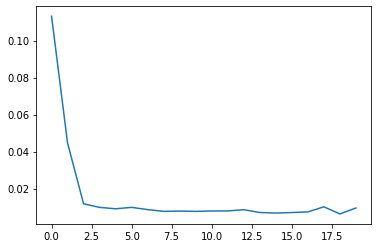

In [16]:
my_loss= model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [96]:
test_predictions = []

# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to the format RNN wants (same format as TimeseriesGeneration)
current_batch = first_eval_batch.reshape((1,n_input,n_feature))

#how far into the future will I forecast?

for i in range(len(test)):
    
    # One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    # UPDATE current batch o include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

In [97]:
true_predictions = scaler.inverse_transform(test_predictions)
# true_predictions

In [98]:
true_predictions

array([[179.33241937],
       [227.60717781],
       [277.06890527],
       [301.99018154],
       [310.80519786],
       [290.90134904],
       [264.58695615],
       [254.79714479],
       [244.78075388],
       [228.74198236],
       [191.29856435],
       [177.28892189]])

In [99]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, true_predictions)
print('MAE: %f' % mae)

MAE: 9.900876


In [100]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test, true_predictions)
print('MAPE: %f' % mape)

MAPE: 4.130439


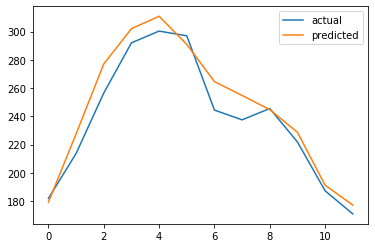

In [101]:
from matplotlib import pyplot as plt
plt.plot(test)
plt.plot(true_predictions)
plt.legend(labels =[ 'actual','predicted'])
plt.show()

In [102]:
r2_score(test, true_predictions)

0.9229881099209728